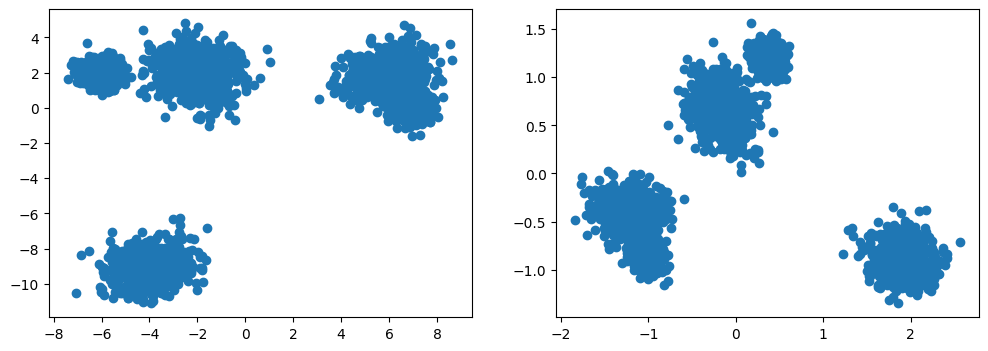

k = 3, log likelihood = -0.8591830598715621
k = 4, log likelihood = -0.5540794515301948
k = 5, log likelihood = -0.41261931777745225
k = 6, log likelihood = -0.41325752475745
k = 7, log likelihood = -0.4128663003360693
best k = 5, log likelihood = -0.41261931777745225


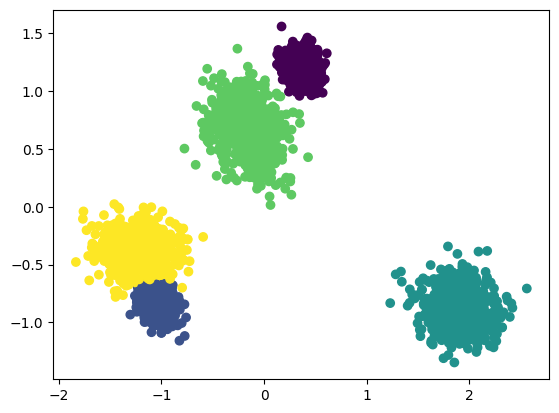

In [2]:
# use gaussian mixture model to cluster the data

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load data
data = np.loadtxt('../datasets/2D_data_points_2.txt', delimiter=',')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(data[:,0], data[:,1])

# standardize data
scaler = StandardScaler()
data = scaler.fit_transform(data)


# reduce dimension
pca = PCA(n_components=2)
data = pca.fit_transform(data)

ax[1].scatter(data[:,0], data[:,1])
plt.show()

# fit model
# run the model for different number of clusters and pick the best one

best_gmm = None
log_likelihood = -np.inf
for k in range(3, 8):
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(data)
    labels = gmm.predict(data)
    if gmm.score(data) > log_likelihood:
        best_gmm = gmm
        log_likelihood = gmm.score(data)

    print('k = {}, log likelihood = {}'.format(k, gmm.score(data)))

gmm = best_gmm
labels = gmm.predict(data)

print('best k = {}, log likelihood = {}'.format(gmm.n_components, gmm.score(data)))

# plot
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()
